In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('dark_background')

In [ ]:
df = pd.read_csv('/content/kc-house-data (1).csv')

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


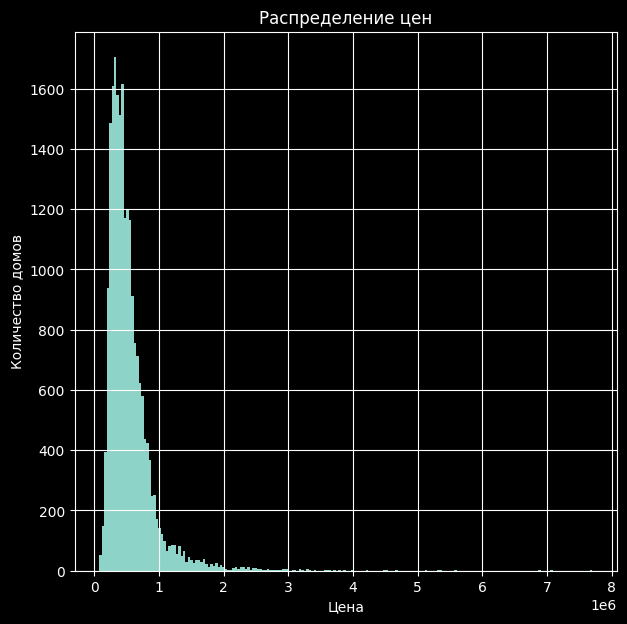

In [ ]:
plt.figure(figsize=(7,7))
data = df['price']
plt.hist(data, bins=200)
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.grid()

###1.2 По графику видно, что основная масса домов сосредоточена в ценовом диапазоне примерно от 100000 до 700000, но также присутствуют очень дорогие дома, стоимостью до 7,7 миллиона, что сильно сдвигает среднюю цену за дом



---



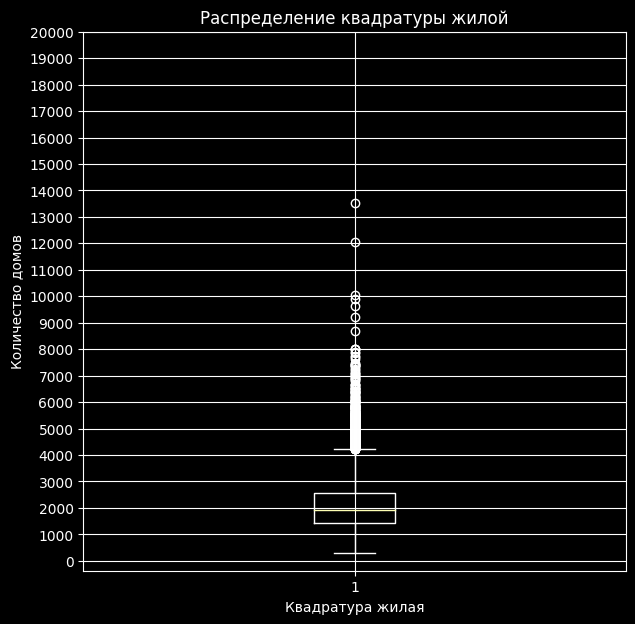

In [ ]:
plt.figure(figsize=(7,7))
data = df['sqft_living']
plt.boxplot(data)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Квадратура жилая')
plt.ylabel('Количество домов')
plt.grid()
plt.yticks(range(0,21000,1000));

###1.3 Из графика видно, что 50% всех домов имеют жилую площадь примерно между 1300 и 2700, а площадь более 99% всех домов располагается в промежутке 250 - 4200, но также присутствуют очень большие дома, площадью более 6000, что также сдвигает среднее значение площади в большую сторону


''

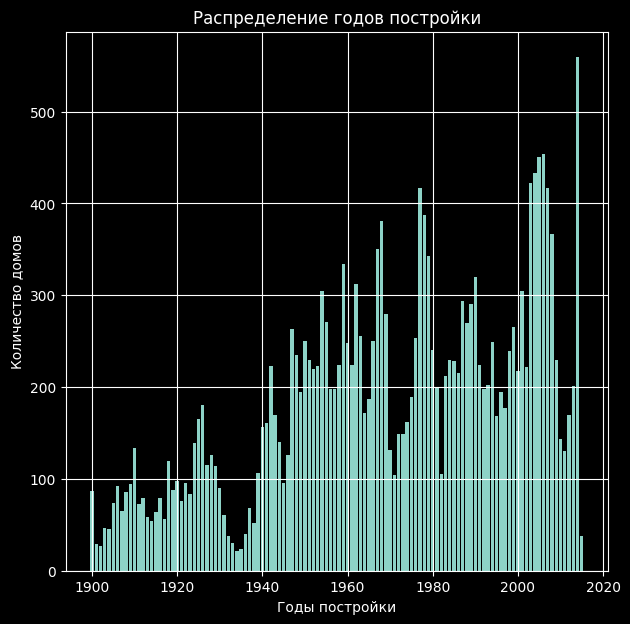

In [ ]:
plt.figure(figsize=(7,7))
data = df['yr_built'].value_counts()
plt.bar(data.index, data)
plt.title('Распределение годов постройки')
plt.xlabel('Годы постройки')
plt.ylabel('Количество домов')
plt.grid()
;

###1.4 На данном графике можно проследить зависимость, что новых домов больше, чем старых, чем дальше по времени мы уходим в прошлое, тем меньше домов мы наблюдаем, объяснить это можно тем, что со временем дома ветшают и разрушаются и люди переезжают в более новые дома, а новые дома еще не успели обветшать и разрушиться, поэтому их больше

<Axes: xlabel='waterfront', ylabel='yr_built'>

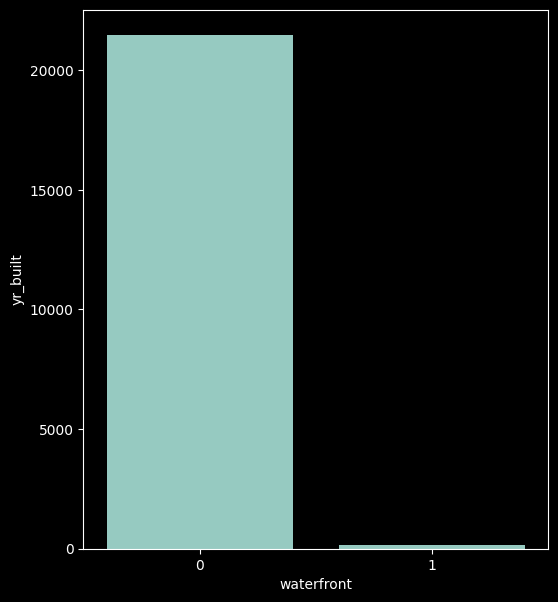

In [ ]:
plt.figure(figsize=(6,7))
data = df.groupby('waterfront')['yr_built'].count()
sns.barplot(data)

<Axes: xlabel='waterfront', ylabel='price'>

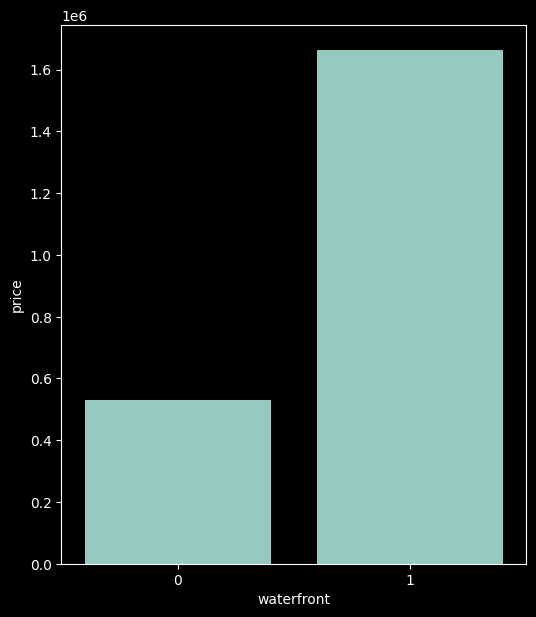

In [ ]:
plt.figure(figsize=(6,7))
data = df.groupby('waterfront')['price'].mean()
sns.barplot(data)

###2.1 Из этих двух графиков видно, что подавляющее количество домов не имеют вида на набережную (график 1), а те дома, у которых он есть, в среднем стоят дороже более чем в 2 раза (график 2)


Text(0.5, 1.0, 'Распределение домов по количеству этажей')

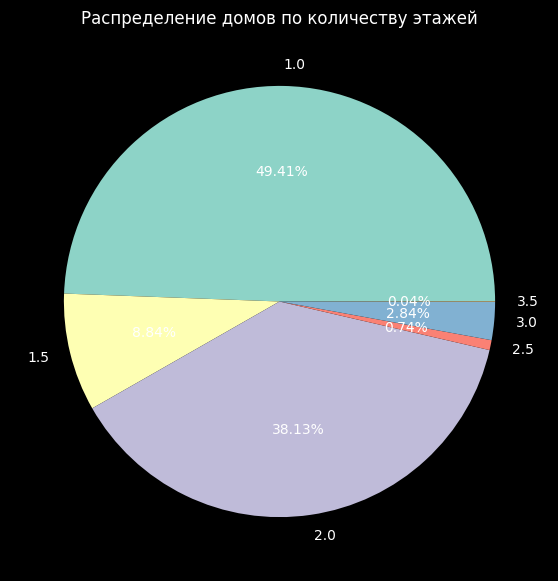

In [ ]:
plt.figure(figsize=(7,7))
data = df.groupby('floors')['yr_built'].count()
plt.pie(data, labels=data.index, autopct='%.2f%%');
plt.title('Распределение домов по количеству этажей')

###2.2 На диаграмме видно, что большая часть домов имеет 1 или 2 этажа, а домов с большим количеством этажей довольно мало


<Axes: xlabel='condition', ylabel='count'>

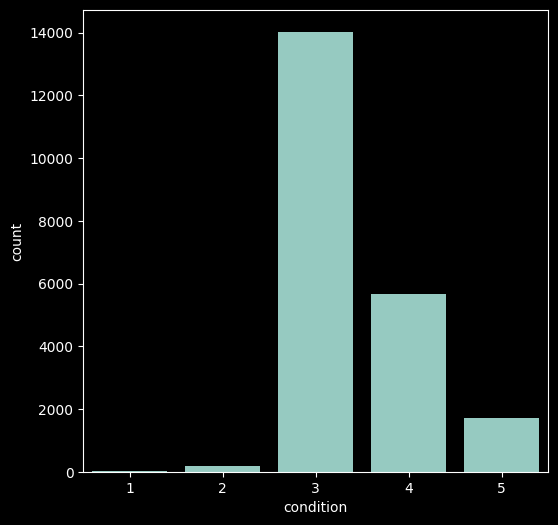

In [ ]:
plt.figure(figsize=(6,6))
data = df['condition'].value_counts()
sns.barplot(data)

###2.3 Из графика видно, что большая часть домов находятся в среднем состоянии, но есть существенная часть домов, имеющих хорошее и отличное состояние, а домов с плохим и ужасным состоянием довольно мало.
###Это может быть связано с тем, что никто не хочет продавать дом дешёво из-за плохого состояния, проще его чуть-чуть подделать, доведя состояние до среднего, и продать значительно дороже

<Axes: >

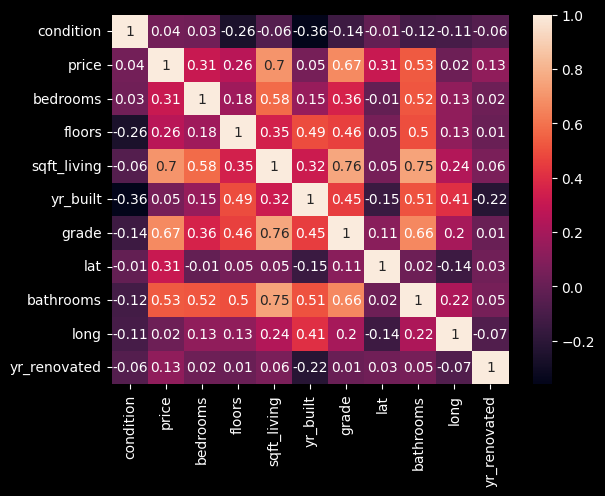

In [ ]:
corr_mat = df[['condition', 'price', 'bedrooms', 'floors', 'sqft_living', 'yr_built', 'grade','lat', 'bathrooms', 'long', 'yr_renovated']].corr().round(2)
sns.heatmap(corr_mat, annot=True)

###3 По матрице корреляций можно оценить, от чего у нас линейно зависит цена, чтоб потом копать глубже, возьмём характеристики, корреляция с которыми больше 0.3

<BarContainer object of 13 artists>

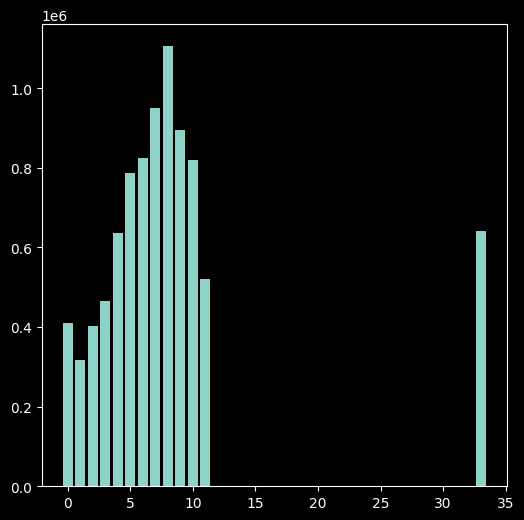

In [ ]:
plt.figure(figsize=(6,6))
data = df.groupby('bedrooms')['price'].mean()
plt.bar(data.index,data)

In [ ]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

### При увеличении количества спален, стоимость дома увеличивается, домов с количеством спален больше 7 совсем мало, их единицы, из-за чего график после 7 ведёт себя странно, из-за чего можно допустить, что это шум ввиду маленькой выборки домов с большим количеством спален

Text(0.5, 1.0, 'Зависимость цены от жилой площади')

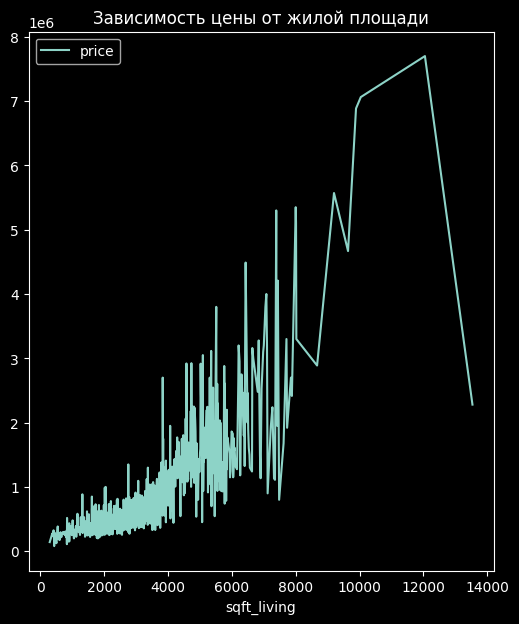

In [ ]:
plt.figure(figsize=(6,7))
data = pd.pivot_table(df, index='sqft_living', values='price', aggfunc='mean')
sns.lineplot(data)
plt.title('Зависимость цены от жилой площади');

###На графике виден восходящий тренд, с увеличением жилой площади, растёт средняя цена за дом, в самом конце график падает опять же из-за одного дома с большой площадью, но это выброс, искажающий реальность, поскольку на графике 21000 домов и видна зависимость  

<Axes: xlabel='grade', ylabel='price'>

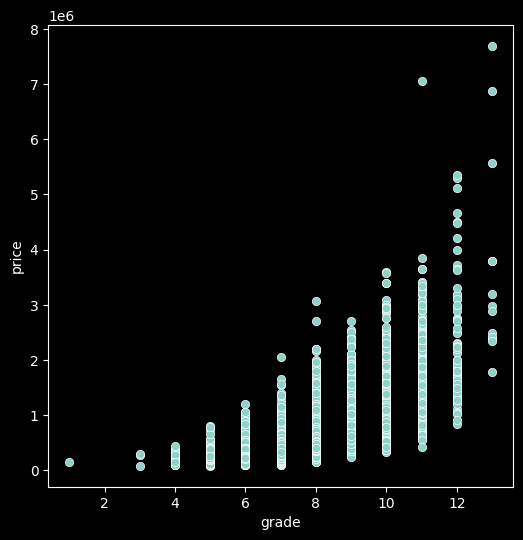

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df['grade'], y=df['price'])

###На чётко прослеживается рост цены от оценки дома, что собственно логично

<Axes: xlabel='lat', ylabel='price'>

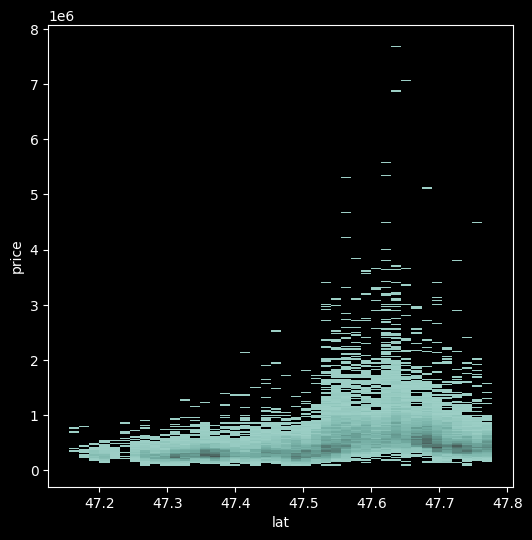

In [ ]:
plt.figure(figsize=(6,6))
sns.histplot(x=df['lat'], y=df['price'])

###Да, гистограмму использовал не по назначению, но получилось красиво =)
###На графике видно, что с увеличением широты растёт цена недвижимости, это может быть связано с конкретным городом и местностью, возможно на более высокой широте распологается более дорогой район, или возможно с увеличением широты, дом становится ближе к береговой линии